### import os for  operating system operations e.g., creating a folder

In [1]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [2]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [3]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [4]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [5]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [6]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [7]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [8]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,66.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,48.207576,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,16.390328,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,33.300000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,61.350000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


### Check for null and NaN values

In [9]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN               252
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

In [10]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

### copy dataset

In [11]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [12]:

df = dataset[:]

### remove the date column

In [13]:

del df['DATE']

In [14]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [15]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [17]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(190, 7)
(128, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [18]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(64, 7)
(64, 7)


In [19]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (190, 7)
Test dataset       : (64, 7)
Validation dataset : (64, 7)


## Plot the relationship between each two variables to spot anything incorrect.

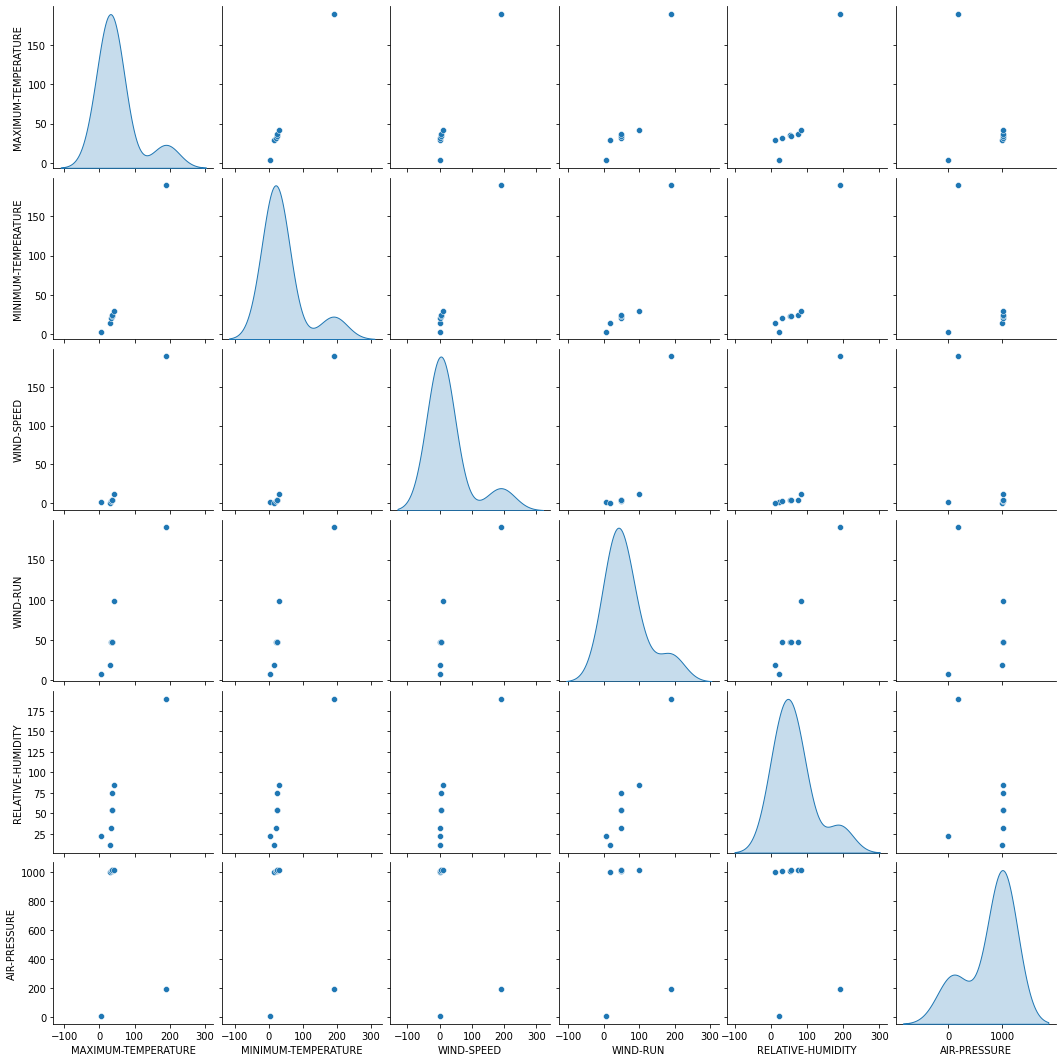

In [20]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [21]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count    190.000000
mean     164.294737
std       55.164952
min       58.000000
25%      120.000000
50%      160.500000
75%      202.250000
max      307.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-SPEED"

In [22]:
train_labels = train_dataset.pop('WIND-SPEED')
test_labels = test_dataset.pop('WIND-SPEED')
valid_labels = valid_dataset.pop('WIND-SPEED')

## Data Normalization/Scaling

### define a function to normalize the data set.

In [23]:


from sklearn.preprocessing import MinMaxScaler

def norm(x):
    cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-DIRECTION','RELATIVE-HUMIDITY','WIND-RUN','AIR-PRESSURE']
    scaler = MinMaxScaler()
    x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
    return x
      
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [24]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (190, 6) 
Test        : (64, 6) 
Validate    : (64, 6) 
Train/Test/Validate labels: 
Train Labels : (190,)
Test Labels  : (64,)
Test Labels  : (64,)


## show a sample of the data after normalized

In [25]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
62,0.838983,0.675497,0.216867,0.361461,0.191781,0.558442
217,0.805085,0.536424,0.244980,0.361461,0.205479,0.818182
131,0.516949,0.245033,0.269076,0.361461,0.452055,0.798701
182,0.949153,0.807947,0.353414,0.361461,0.191781,0.720779
179,0.567797,0.198675,0.172691,0.361461,0.397260,0.811688
165,0.415254,0.655629,0.718876,0.361461,0.602740,0.727273
194,0.940678,0.821192,0.473896,0.361461,0.150685,0.629870
224,0.186441,0.642384,0.369478,0.361461,0.931507,0.766234
109,0.618644,0.496689,0.228916,0.361461,0.178082,0.707792
264,0.550847,0.403974,0.248996,0.224181,0.232877,0.298701


## Build a Neural Network Model

### We declared a function for creating a model.

In [26]:


def model1_single_layer_perceptron():
    model = keras.Sequential([
       keras.layers.Dense(1,input_shape=(6,)) 
    ])
    model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse','mape'])
    
    return model
    
        

In [ ]:
model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

## import NN and other components.

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [ ]:
def model2_multilayer_perceptron_with_one_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 10 Neurons
      model.add(Dense(10, input_shape =(normed_train_data.shape[1],)))
      
    
      model.add(Dropout(0.5))
    
      model.add(Dense(35, Activation('relu'))) # Hidden layer 1
        
      model.add(Dropout(0.5))

      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model


In [ ]:
model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

In [ ]:
def model3_multilayer_perceptron_with_two_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
      
      model.add(Dense(50, Activation('relu'))) # Hidden layer 1
     
      model.add(Dense(50, Activation('relu'))) # Hidden layer 3
      
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [ ]:
model3 = model3_multilayer_perceptron_with_two_hidden_layer()
print('Here is a summary of this model: ')


model3.summary()


## Test the model before training (this will use the initial weights)

In [315]:

example_result_1 = model1.predict(normed_train_data) # Here we are using the single layer perceptron model



NameError: name 'model1' is not defined

## Compare the predicted values with the actual values 

In [110]:
print('Predicted Values')
print(example_result_1[:10])
print()
print('Actual Values')
print(train_labels[:10].to_string(index=False))

Predicted Values
[[ 0.13333687]
 [-0.07018387]
 [ 0.26403373]
 [-0.01076543]
 [ 0.00234303]
 [ 0.21430323]
 [-0.22250609]
 [ 0.21001464]
 [-0.22536936]
 [ 0.20366734]]

Actual Values
4.0
6.0
3.0
1.7
1.8
5.0
1.4
4.0
2.1
5.0


## Save checkpoints during training

In [111]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

## Training the model we built above.

### Training the single layer perceptron

In [56]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [113]:
%%time

EPOCHS = 1000
batch_size = 6

model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

with tf.device('/CPU:0'):
    history = model1.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:18.6101,  mae:4.1561,  mape:111.5653,  mse:18.6101,  val_loss:18.6609,  val_mae:4.0267,  val_mape:116.4375,  val_mse:18.6609,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 100, loss:7.2002,  mae:2.5177,  mape:90.1197,  mse:7.2002,  val_loss:15.5257,  val_mae:3.6319,  val_mape:103.0497,  val_mse:15.5257,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 200, loss:14.2863,  mae:3.7182,  mape:91.7391,  mse:14.2863,  val_loss:12.8196,  val_mae:3.2600,  val_mape:91.1837,  val_mse:12.8196,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 300, loss:10.9959,  mae:3.0047,  mape:76.0908,  mse:10.9959,  val_loss:10.5758,  val_mae:2.9162,  val_mape:80.3725,  val_mse:10.5758,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 400, loss:4.6128,  mae:1.9529,  mape:64.4984,  mse:4.6128,  val_loss:8.6955,  val_mae:2.6046,  val_mape:71.5152,  val_mse:8.6955,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 500, loss:6.0633,  mae:2.0883,  mape:55.5507,  mse:6.0633,  val_loss:7.1767,  val_mae:2.3272,  val_mape:64.0364,  val_mse:7.1767,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 600, loss:5.4969,  mae:2.2842,  mape:56.5610,  mse:5.4969,  val_loss:5.9082,  val_mae:2.0838,  val_mape:58.1603,  val_mse:5.9082,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 700, loss:3.9019,  mae:1.5839,  mape:38.1055,  mse:3.9019,  val_loss:4.9330,  val_mae:1.8786,  val_mape:53.4683,  val_mse:4.9330,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 800, loss:0.4461,  mae:0.5378,  mape:24.1735,  mse:0.4461,  val_loss:4.1518,  val_mae:1.6996,  val_mape:49.6519,  val_mse:4.1518,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 900, loss:1.5769,  mae:1.1070,  mape:33.6730,  mse:1.5769,  val_loss:3.5543,  val_mae:1.5469,  val_mape:46.6529,  val_mse:3.5543,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


Wall time: 15min 57s


In [114]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,2.184424,1.247004,2.184424,49.559597,3.133083,1.437069,3.133083,45.019665,995
996,2.247325,1.420228,2.247325,40.868103,3.128980,1.436058,3.128980,45.009312,996
997,3.367281,1.587547,3.367281,70.488045,3.125264,1.435141,3.125264,44.999756,997
998,2.336240,1.327616,2.336240,34.003517,3.121525,1.434215,3.121525,44.990097,998
999,1.795292,0.983294,1.795292,36.125736,3.117955,1.433330,3.117955,44.980831,999


In [115]:
# Test the model after training
example_result_2 = model1.predict(normed_test_data)

## Compare the predicted values with the actual values

In [116]:
print('Predicted Values')
print(example_result_2[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[2.084734 ]
 [2.1898496]
 [2.0366168]
 [3.3747025]
 [2.785612 ]
 [2.6910448]
 [2.3291717]
 [2.2021205]
 [2.7668815]
 [1.5194459]]

Actual Values
4.0
3.0
3.0
5.0
6.0
4.0
3.0
3.0
1.1
2.0


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

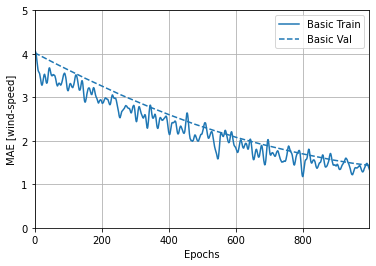

In [118]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,5])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

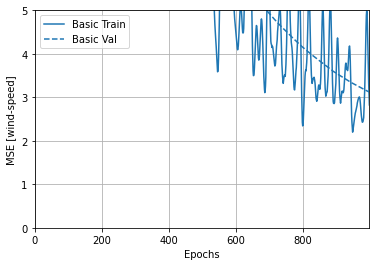

In [119]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5])
plt.ylabel('MSE [wind-speed]')

In [120]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model1.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 3.0474 - mae: 1.3594 - mse: 3.0474 - mape: 15778021.0000
Train set Mean Abs Error :  1.36
Train set Mean Square Error :  3.05


In [121]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 3.1180 - mae: 1.4333 - mse: 3.1180 - mape: 44.9808
Validation set Mean Abs Error :  1.43
Validation set Mean Square Error :  3.12


In [122]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 2.4880 - mae: 1.2498 - mse: 2.4880 - mape: 37.9534
Testing set Mean Abs Error :  1.25
Testing set Mean Square Error :  2.49


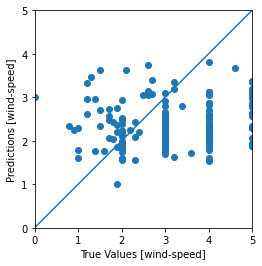

In [160]:
train_predictions = model1.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

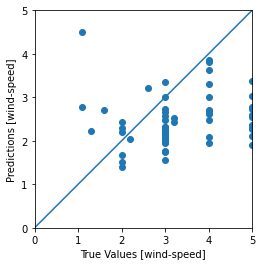

In [124]:
test_predictions = model1.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

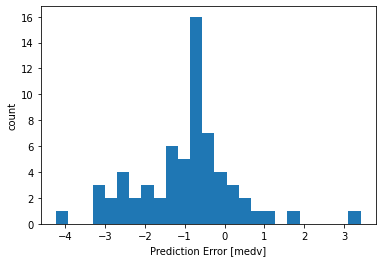

In [125]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## One hidden layer analysis

In [57]:
# checkpoint_path
checkpoint_path = r".\models\wind_speed_prediction2.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [58]:
%%time

EPOCHS = 1000
batch_size = 6

model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

with tf.device('/CPU:0'):
    history = model2.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                70        
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 35)                385       
_________________________________________________________________
dropout_6 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:11.2801,  mae:2.9762,  mape:95.8278,  mse:11.2801,  val_loss:11.9234,  v

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets



Epoch: 100, loss:4.5805,  mae:1.8438,  mape:51.4246,  mse:4.5805,  val_loss:2.3176,  val_mae:1.1990,  val_mape:48020516.0000,  val_mse:2.3176,  
..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


...........................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


...........................
Epoch: 200, loss:0.4233,  mae:0.5953,  mape:22.8011,  mse:0.4233,  val_loss:1.9310,  val_mae:1.0815,  val_mape:52330980.0000,  val_mse:1.9310,  
........................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


..........................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.........................
Epoch: 300, loss:3.4833,  mae:1.4292,  mape:66.5077,  mse:3.4833,  val_loss:1.8224,  val_mae:1.0564,  val_mape:53153156.0000,  val_mse:1.8224,  
.........

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.........................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.............................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


................................
Epoch: 400, loss:2.4745,  mae:1.4019,  mape:41.2675,  mse:2.4745,  val_loss:1.8659,  val_mae:1.0630,  val_mape:51851872.0000,  val_mse:1.8659,  
....................................................................................................
Epoch: 500, loss:3.9108,  mae:1.5473,  mape:92.6390,  mse:3.9108,  val_loss:1.7930,  val_mae:1.0331,  val_mape:53343220.0000,  val_mse:1.7930,  
.............................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction2.ckpt\assets


...................................................
Epoch: 600, loss:1.2724,  mae:0.9842,  mape:33.5431,  mse:1.2724,  val_loss:1.7844,  val_mae:1.0287,  val_mape:53623340.0000,  val_mse:1.7844,  
....................................................................................................
Epoch: 700, loss:1.8780,  mae:1.0745,  mape:39.6351,  mse:1.8780,  val_loss:1.7557,  val_mae:1.0265,  val_mape:54345356.0000,  val_mse:1.7557,  
....................................................................................................
Epoch: 800, loss:5.4216,  mae:1.5450,  mape:32.1743,  mse:5.4216,  val_loss:1.7545,  val_mae:1.0278,  val_mape:54404036.0000,  val_mse:1.7545,  
....................................................................................................
Epoch: 900, loss:1.0871,  mae:0.9227,  mape:24.3308,  mse:1.0871,  val_loss:1.6854,  val_mae:1.0311,  val_mape:57143428.0000,  val_mse:1.6854,  
.................................................................

In [59]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,1.688802,0.800624,1.688802,21.186783,1.796066,1.031899,1.796066,53797540.0,995
996,3.842956,1.493418,3.842956,43.098141,1.794174,1.031851,1.794174,53774568.0,996
997,1.963191,1.302500,1.963191,47.702728,1.787426,1.030838,1.787426,53969668.0,997
998,1.830160,1.244443,1.830160,41.187450,1.779172,1.031425,1.779172,54235868.0,998
999,3.091715,1.497321,3.091715,94.236778,1.823664,1.036435,1.823664,53119488.0,999


In [60]:
# Test the model after training
example_result_3 = model2.predict(normed_test_data)

## Compare the predicted values with the actual values

In [61]:
print('Predicted Values')
print(example_result_3[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[2.8017535]
 [2.3722253]
 [2.508014 ]
 [2.304344 ]
 [2.3994415]
 [2.3266964]
 [2.2112281]
 [2.4434557]
 [2.6990378]
 [2.4795275]]

Actual Values
2.8
3.0
2.0
2.0
4.0
3.0
3.0
3.0
5.0
5.0


In [62]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,1.688802,0.800624,1.688802,21.186783,1.796066,1.031899,1.796066,53797540.0,995
996,3.842956,1.493418,3.842956,43.098141,1.794174,1.031851,1.794174,53774568.0,996
997,1.963191,1.302500,1.963191,47.702728,1.787426,1.030838,1.787426,53969668.0,997
998,1.830160,1.244443,1.830160,41.187450,1.779172,1.031425,1.779172,54235868.0,998
999,3.091715,1.497321,3.091715,94.236778,1.823664,1.036435,1.823664,53119488.0,999


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

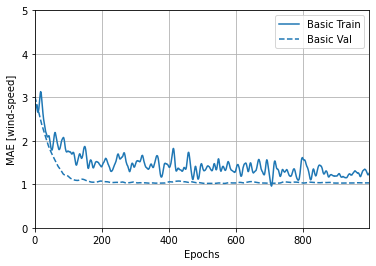

In [63]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,5])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

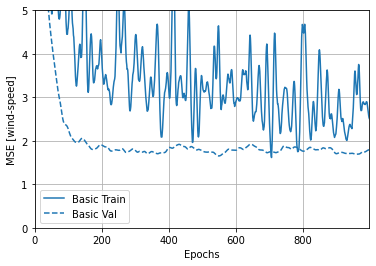

In [64]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5])
plt.ylabel('MSE [wind-speed]')

In [65]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model2.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 2.2488 - mae: 1.0985 - mse: 2.2488 - mape: 32.3448
Train set Mean Abs Error :  1.10
Train set Mean Square Error :  2.25


In [66]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 1.8237 - mae: 1.0364 - mse: 1.8237 - mape: 53119488.0000
Validation set Mean Abs Error :  1.04
Validation set Mean Square Error :  1.82


In [67]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 2.0076 - mae: 1.1290 - mse: 2.0076 - mape: 38.5282
Testing set Mean Abs Error :  1.13
Testing set Mean Square Error :  2.01


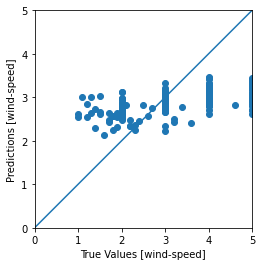

In [68]:
train_predictions = model2.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

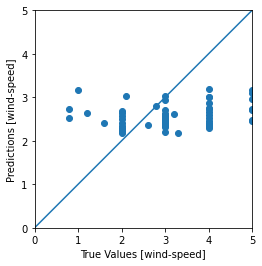

In [69]:
test_predictions = model2.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

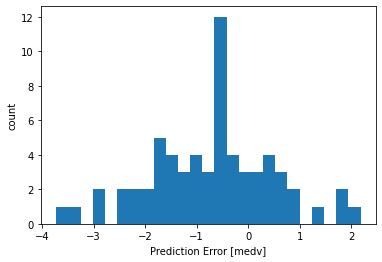

In [70]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## Two hidden layer analysis

In [316]:
# checkpoint_path
checkpoint_path = r".\models\wind_speed_prediction3.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [319]:
%%time

EPOCHS = 200
batch_size = 6

model3 = model3_multilayer_perceptron_with_two_hidden_layer()
print('Here is a summary of this model: ')
model3.summary()

with tf.device('/CPU:0'):
    history = model3.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 26)                182       
_________________________________________________________________
dense_199 (Dense)            (None, 28)                756       
_________________________________________________________________
dense_200 (Dense)            (None, 48)                1392      
_________________________________________________________________
dense_201 (Dense)            (None, 1)                 49        
Total params: 2,379
Trainable params: 2,379
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:15.4865,  mae:3.8188,  mape:98.5271,  mse:15.4865,  val_loss:11.7770,  val_mae:3.1330,  val_mape:5398502.0000,  val_mse:11.7770,  
......

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


....................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


...........
Epoch: 100, loss:1.1118,  mae:0.9763,  mape:27.2600,  mse:1.1118,  val_loss:1.9006,  val_mae:1.1132,  val_mape:72820112.0000,  val_mse:1.9006,  
...........................................................................

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_speed_prediction3.ckpt\assets


.....................Wall time: 13h 52min 55s


In [318]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
5,9.505618,2.993586,9.505618,87.190636,10.442751,2.913588,10.442752,6667064.0,5
6,14.624522,3.675962,14.624522,87.547203,10.079159,2.854263,10.079159,7658421.5,6
7,13.219093,3.399122,13.219093,85.516487,9.728564,2.794912,9.728563,8560845.0,7
8,10.502263,2.917369,10.502263,80.620171,9.464465,2.749697,9.464465,9296689.0,8
9,10.436600,3.048103,10.436600,81.593071,9.108049,2.687876,9.108049,10434760.0,9


In [308]:
# Test the model after training
example_result_4 = model3.predict(normed_test_data)


## Compare the Actual Values with the predicted values

In [312]:
print('Predicted Values')
print(example_result_4[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[3.1409407]
 [2.5919297]
 [2.1220217]
 [1.9247777]
 [2.6334896]
 [2.3156118]
 [2.213936 ]
 [1.8366706]
 [2.7853794]
 [2.8306825]]

Actual Values
2.8
3.0
2.0
2.0
4.0
3.0
3.0
3.0
5.0
5.0


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

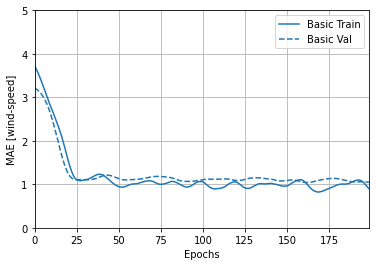

In [288]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,5])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

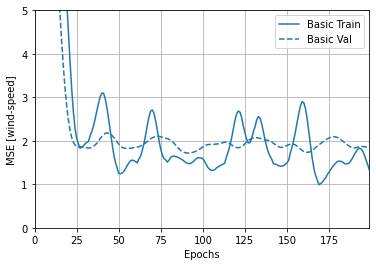

In [289]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5])
plt.ylabel('MSE [wind-speed]')

In [290]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model3.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 1.6695 - mae: 0.9280 - mse: 1.6695 - mape: 29.6622
Train set Mean Abs Error :  0.93
Train set Mean Square Error :  1.67


In [291]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 1.6511 - mae: 0.9981 - mse: 1.6511 - mape: 63487696.0000
Validation set Mean Abs Error :  1.00
Validation set Mean Square Error :  1.65


In [292]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 2.1620 - mae: 1.1792 - mse: 2.1620 - mape: 39.8009
Testing set Mean Abs Error :  1.18
Testing set Mean Square Error :  2.16


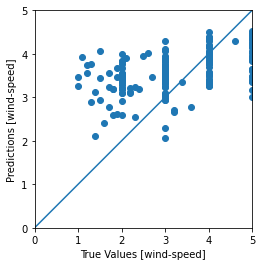

In [190]:
train_predictions = model3.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

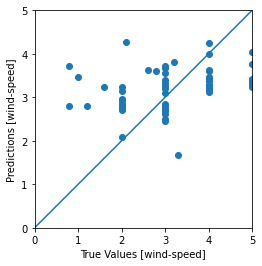

In [191]:
test_predictions = model3.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

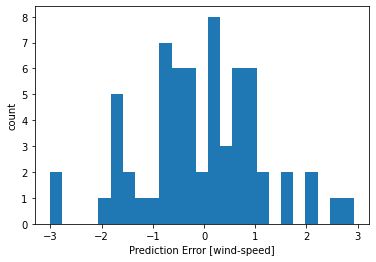

In [192]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [wind-speed]")
_ = plt.ylabel("count")